# <center><h2> Exam 2</h2></center>

### General guidelines:
 * Do your coding in a clean and logical manner.
 * __Make comments on your codes. Make insightful observations after the analysis.__
 * This is an individual assignment.
 * __No plagiarism__: you are encouraged to do reseach, however, do your own work. Do not copy-and-paste AI's or other people's work.    

### Submission:
 * You have to submit this notebook file and the pdf file - remember to add your name in in the filenames. 

<h3> Import Python Tool Modules First</h3>

In [42]:
import numpy as np
import pandas as pd

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Part 1: Baby Name Dataset Analysis (30 Points)</h3>

In this dataset, baby names in the US from 2004 to 2014 are tablulated by gender, year, State, and number of counts.

#### First step: import the dataset (in csv format) from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv). 

<h4>Q1. Read the dataset and assign it to a dataframe called "baby". Display the first 10 rows of the dataset. What are the column labels?</h4>

In [44]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv"
baby = pd.read_csv(url)
baby.head(n = 10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


<h4>Q2. The first two columns "Unnamed: 0" and "Id" are not useful. Please remove them and display the first 5 rows of the new dataframe.</h4> 

In [45]:
# Set the unwanted columns to an empty string value
baby = baby.rename(columns={"Unnamed: 0": "", "Id": ""})
baby.head()

,,,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


<h4>Q3. According to this dataset, how many babies were born each year from 2004 to 2014? Show the results and plot a vertical bar chart for the number of new-borns from 2004 to 2014. Properly label the x-axis and the y-axis.</h4>

<Axes: xlabel='Year', ylabel='count'>

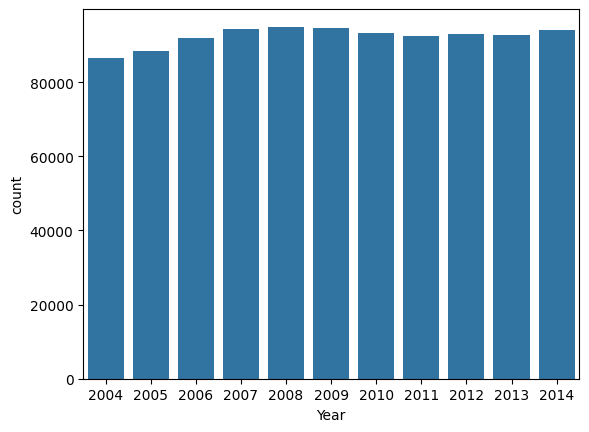

In [46]:
# Select the column Year, count the occurnce of the year,
# then sort by the index
year_counts = baby['Year'].value_counts().sort_index()

# Use seaboarn to plot the bar graph
sns.barplot(year_counts)

<h4>Q4. How many boys (M) and girls (F) were born each year from 2004 to 2014? Show the results and plot a grouped bar chart, one for boys and one for girls. Please add a legend. </h4>

<Axes: xlabel='Year', ylabel='count'>

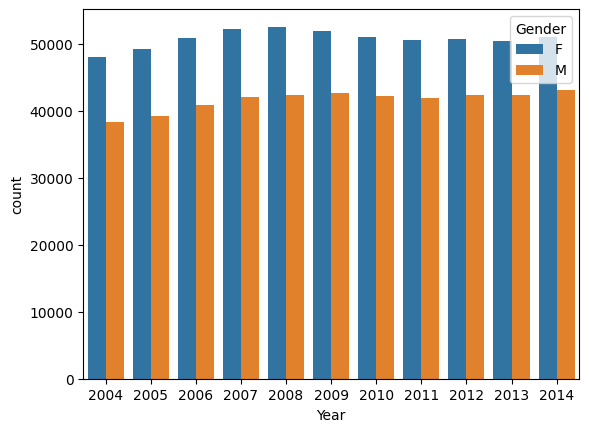

In [47]:
# Create a new dataframe that combines, year, gender, and separates by gender
year_gender = baby[['Year', 'Gender']].value_counts().sort_index().to_frame()

# Pass the new dataframe to seaborn 
sns.barplot(data=year_gender, x='Year', y='count', hue='Gender')

<h4>Q5. Are there more unique male names or female names in the dataset?</h4>

In [48]:
# First sort the main dataframe into just name and gender
# and delete the duplicates
name = baby[['Name', 'Gender']].drop_duplicates()

# Then count the number of times each gender occurs
gender = name['Gender'].value_counts()
print(gender)

Gender
F    10929
M     8012
Name: count, dtype: int64


<h4>Q6. What is the most popular boy's name from 2004 to 2014? What is the most popular girl's name from 2004 to 2014?</h4>

In [49]:
boys = baby.loc[baby['Gender'] == 'M']
boys_count = boys.groupby('Name')['Count'].max().sort_values(ascending=False)
print(boys_count.head(n = 1))


girls = baby.loc[baby['Gender'] == 'F']
girls_count = girls.groupby('Name')['Count'].max().sort_values(ascending=False)
print(girls_count.head(n = 1))

Name
Daniel    4167
Name: Count, dtype: int64
Name
Sophia    3634
Name: Count, dtype: int64


<h4>Q7. For the State of Georgia, what was the most popular boy's name in 2008? How about girl's name?</h4>

In [50]:
# Grab the values of year 2008
year = baby.loc[baby['Year'] == 2008]
state = year.loc[year['State'] == 'GA']

# Grab only the boys, and then count the number of times
# each name appears, and then grab the top of the graph
boys = state.loc[baby['Gender'] == 'M']
boys_count = boys.groupby('Name')['Count'].max().sort_values(ascending=False)
print(boys_count.head(n = 1))

girls = state.loc[baby['Gender'] == 'F']
girls_count = girls.groupby('Name')['Count'].max().sort_values(ascending=False)
print(girls_count.head(n = 1))

Name
William    914
Name: Count, dtype: int64
Name
Madison    683
Name: Count, dtype: int64


<h4>Q8. Let's see how popular your name is in the US. </h4>

<h4>How many babies in this dataset have the same first name as you? </h4>

In [51]:
ryan = baby.loc[baby['Name'] == 'Ryan']
ryan_count = ryan.groupby('Name')['Count'].max()
print(ryan_count)

Name
Ryan    2518
Name: Count, dtype: int64


<h4>Q9. Which states experienced the greatest increase in the total number of newborns between 2004 and 2014? </h4>
<h4>How about the bottom five states with the lowest increase during the same period? So, for each state, you add up all the baby counts from 2004 to 2014 and figure out what the top 5 and bottom 5 states are.</h4>





In [52]:
# First I grouped the dataframe by state and year and summed them
state_year = baby.groupby(['State', 'Year']).sum().reset_index()

# Then I created a new column that calculated the differences and replaced any
# NaN with 0
state_year['Growth'] = state_year.groupby('State')['Count'].diff().fillna(0)

# Then grouping by state I summed the growth column giving the overall
# growth of each state
state_growth = state_year.groupby('State')['Growth'].sum().reset_index()

# Then I sorted from high to low and low to high
state_growth_high = state_growth.sort_values(by='Growth', ascending=False)
state_growth_low = state_growth.sort_values(by='Growth', ascending=True)

print("Top 5: \n")
print(state_growth_high.head())

print("\nBottom 5: \n")
print(state_growth_low.head())

Top 5: 

   State   Growth
43    TX  12199.0
47    WA   3924.0
28    ND   1651.0
40    SC   1196.0
27    NC    849.0

Bottom 5: 

   State   Growth
4     CA -44041.0
14    IL -22207.0
22    MI -14691.0
34    NY -13170.0
35    OH -11843.0


# Part 2: The PIMA Diabetic Data Set 

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. It consists of several diagnostic measurements from female patients at least 21 years old of Pima Indian heritage. It also shows the diagnosis on whether the patients have diabetes mellitus disease.

### The filename of the dataset is "diabetes.csv" that comes with this assignment.

The dataset contains the following features/columns:

 * __Pregnancies__: Number of times pregnant
 * __Glucose__: Plasma glucose concentration at 2 hour in an oral glucose tolerance test (mg/dL)
 * __BloodPressure__: Diastolic blood pressure (mm Hg)
 * __SkinThickness__: Triceps skin fold thickness (mm)
 * __Insulin__: 2-hour serum insulin level (mu U/ml)
 * __BMI__: Body mass index (weight in kg/(height in m)^2)
 * __DiabetesPedigreeFunction__: a function which scores likelihood of diabetes based on family history
 * __Age__: age of patients (years)
 * __Outcome__: class variable 0 or 1 indicating disease (0: non-diabetic, 1: diabetic)


## Part 2.1: Data Preparation and Cleaning (15 points)

Some typical tasks in this part include:
 1. Load the dataset in a data frame
 2. Examine the dataset attributes: index, columns, range of values etc.
 3. Handle missing and invalid data
 4. Identify and remove outliers

### Examine the dataset¶
**Q1: Load the dataset in a data frame and show the dataset attributes: index, columns, range of values etc.**

In [53]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### Handling missing data:
   **Q2: Are there missing values in the data set? Write a code to find out.**

### Missing value analysis

In [54]:
diabetes_df.isna().sum()
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
class                       0
dtype: int64

It appear that there is no missing data

 **Q3: You may notice some of the columns have unreasonable zero values (for example, Glucose and BMI). Identify those columns and replace the zeros with the median value of that column.**

In [55]:
columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in columns:
    mean_val = diabetes_df[col].mean()
    diabetes_df[col] = diabetes_df[col].replace(0, mean_val)

diabetes_df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### Handling Outliers:
**Q4: Use boxplot to identify outliers for BMI data. Replace the outliers with the median BMI value** 

<Axes: xlabel='BMI'>

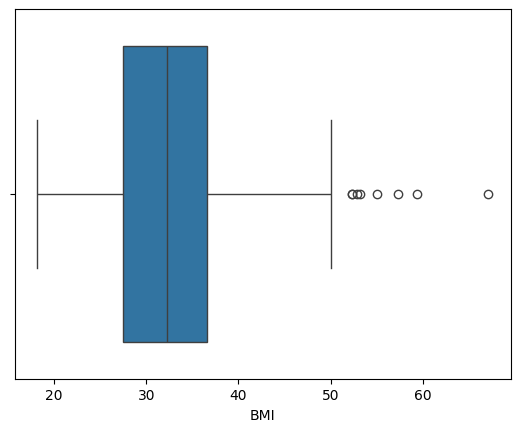

In [56]:
bmi = diabetes_df["BMI"]
sns.boxplot(bmi, orient='h')

<Axes: xlabel='BMI'>

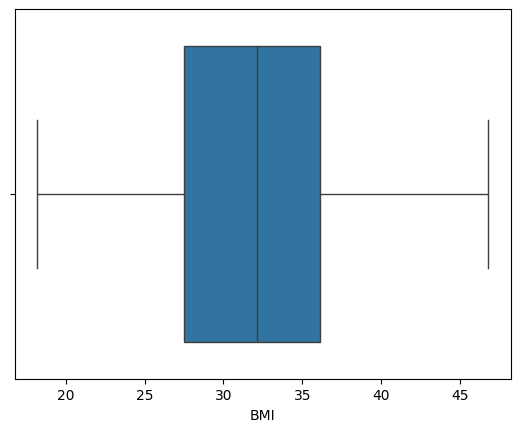

In [57]:
quant_high = bmi.quantile(0.98)
bmi = bmi[bmi < quant_high]
sns.boxplot(bmi, orient='h')

## Part 2.2: In-Depth Analysis 

In this section, you will write codes to answer __three__ questions about the dataset. The first two are given and you need to come up with your own question for the third one. For example, you may analyze how individual feature (column data) impacts the outcome of the diagnosis.

### Q1. Do older women have higher chances of getting diabetes?  
#### You may need to create a bar chart with women in different age groups and show the percentage and/or total number of diabetic vs. non-diabetic in each group.

/tmp/ipykernel_183851/1048986127.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_outcome_counts = diabetes_df.groupby(['Age_Group', 'Outcome']).size().reset_index(name='Count')
/tmp/ipykernel_183851/1048986127.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_totals = age_outcome_counts.groupby('Age_Group')['Count'].transform('sum')


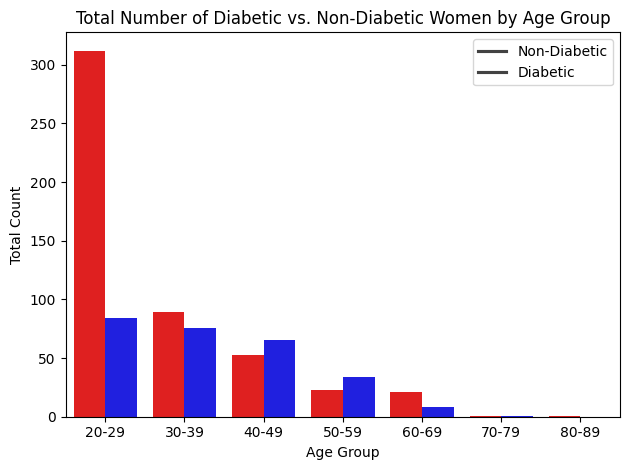

In [58]:
age_groups = [20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

diabetes_df['Age_Group'] = pd.cut(diabetes_df['Age'], bins=age_groups, labels=age_labels, right=False)

diabetes_df["Outcome"] = diabetes_df['class'].map({'tested_positive': 1, 'tested_negative': 0})

age_outcome_counts = diabetes_df.groupby(['Age_Group', 'Outcome']).size().reset_index(name='Count')

age_totals = age_outcome_counts.groupby('Age_Group')['Count'].transform('sum')

fig, ax = plt.subplots(1, sharey=True)

sns.barplot(data=age_outcome_counts, x='Age_Group', y='Count', hue='Outcome', ax=ax, palette=['red', 'blue'])
ax.set_title('Total Number of Diabetic vs. Non-Diabetic Women by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Total Count')
ax.legend(['Non-Diabetic', 'Diabetic'])

plt.tight_layout()
plt.show()


### Analysis:

As the age group is increasing the proportion of diabetes increases. So the longer a person is overwieght, the more likely they are to develope diabetes.

### 2. Based on BMI data, how many of this group of patients are considered underweight, normal, overweight, obese (class I, II, and III)? 

  - underwieght: 0 < BMI < 18.5
  - normal: 18.5 =< BMI < <25
  - overweight: 25 =< BMI <30
  - class I: 30 =< BMI < 35
  - class II: 35 =< BMI <40
  - class III: BMI >= 40

In [59]:
categories =  ['Underweight', 'Normal', 'Overweight', 'Class I', 'Class II', 'Class III']
cat_ranges = [0, 18.5, 25, 30, 35, 40, float('inf')]

diabetes_df["BMI Class"] = pd.cut(diabetes_df["BMI"], bins= cat_ranges, labels= categories, right=False)
counts = diabetes_df["BMI Class"].value_counts().sort_index()
print(counts)


BMI Class
Underweight      4
Normal         102
Overweight     179
Class I        235
Class II       150
Class III       98
Name: count, dtype: int64


### Analysis:

Of the participants in the study the majority of people fall into the Class I obese category. 

### 3. Your own question here.

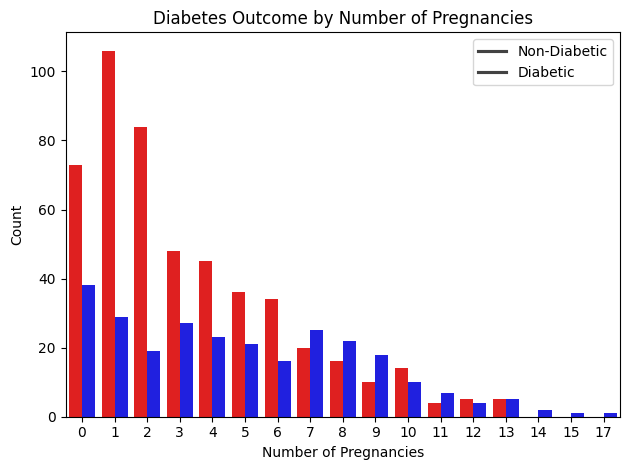

In [60]:
pregnancy_outcome_counts = diabetes_df.groupby(['Pregnancies', 'Outcome']).size().reset_index(name='Count')

sns.barplot(data=pregnancy_outcome_counts, x='Pregnancies', y='Count', hue='Outcome', palette=['red', 'blue'])
plt.title('Diabetes Outcome by Number of Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.legend(['Non-Diabetic', 'Diabetic'])
plt.tight_layout()
plt.show()

### Analysis:

I wanted to see if the number of pregnancies had a correlation to the incident of diabetes. It does appear that as the number of pregnancies increases, the percentage of diabetes does in fact increase. There may be in fact a correlation.

<center><h3>Submit both the Jupyter file and the PDF file.</h3></center>